Proyek Recommendation System: **Movie Lens Dataset**
- Nama:**ERIKA BUDIARTI**
- Email: erika.analytic@gmail.com
- Id Dicoding:erika_budiarti

# **Menghubungkan Kaggle ke Google Colaboratory**

**Mengimport kaggle**

In [1]:
!pip install kaggle

**Upload file API Kaggle**

In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p /content/gdrive/My\ Drive/Kaggle
!mv kaggle.json /content/gdrive/My\ Drive/Kaggle/kaggle.json

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

**Upload Dataset dari Kaggle**

In [6]:
!kaggle datasets download -d snehal1409/movielens

  0% 0.00/910k [00:00<?, ?B/s]
100% 910k/910k [00:00<00:00, 34.2MB/s]


In [7]:
!unzip movielens.zip

Archive:  movielens.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


# **Data Understanding**

**Import Library**

In [8]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import tensorflow as tf
from tensorflow import keras
from keras import layers


**Loading Dataset**

In [9]:
movies_df = pd.read_csv('/content/movies.csv')
ratings_df = pd.read_csv('/content/ratings.csv')

## **Dataset Movies**

**Menampilkan 5 baris pertama dataset  "Movies"**

In [10]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Menampilkan jumlah baris dan kolom dalam dataset**

In [11]:
movies_df.shape

(9125, 3)

**Menampilkan nilai unik pada kolom 'title'**

In [12]:
movies_df.title.nunique()

9123

**Menampilkan nilai duplikat pada kolom 'title'**

In [13]:
duplicate_titles = movies_df[movies_df['title'].duplicated(keep=False)]
print(duplicate_titles['title'])

2872               Hamlet (2000)
6172    War of the Worlds (2005)
7127    War of the Worlds (2005)
7151               Hamlet (2000)
Name: title, dtype: object


**Drop nilai duplikat pada kolom 'title'**

In [14]:
movies_df.drop_duplicates(subset='title', keep='first', inplace=True)
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


**Mengubah nama kolom 'title'**

In [15]:
movies_df.rename(columns={'title':'title_year'}, inplace=True)
movies_df

,movieId,title_year,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


**Extract kolom 'title' untuk memisahkan dengan 'year'**

In [16]:
def extract_title(title_year):

  year = title_year[len(title_year)-5:len(title_year)-1]

  if year.isnumeric():
    title_no_year = title_year[:len(title_year)-7]
    return title_no_year

  else:
    return title_year

In [17]:
def extract_year(title_year):

  year = title_year[len(title_year)-5:len(title_year)-1]

  if year.isnumeric():
    return year
    year = int(year)

  else:
    return np.nan

In [18]:
movies_df['title_year'] = movies_df['title_year'].apply(lambda x: x.strip())
movies_df['title'] = movies_df['title_year'].apply(extract_title)
movies_df['year'] = movies_df['title_year'].apply(extract_year)
movies_df.drop(['title_year'], axis=1, inplace=True)

In [19]:
movies_df.head()

,movieId,genres,title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995


**Memisahkan nilai-nilai pada kolom "Genres"**

In [20]:
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,genres,title,year
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995
1,2,"[Adventure, Children, Fantasy]",Jumanji,1995
2,3,"[Comedy, Romance]",Grumpier Old Men,1995
3,4,"[Comedy, Drama, Romance]",Waiting to Exhale,1995
4,5,[Comedy],Father of the Bride Part II,1995


**Visualisasi jumlah film untuk setiap genre**

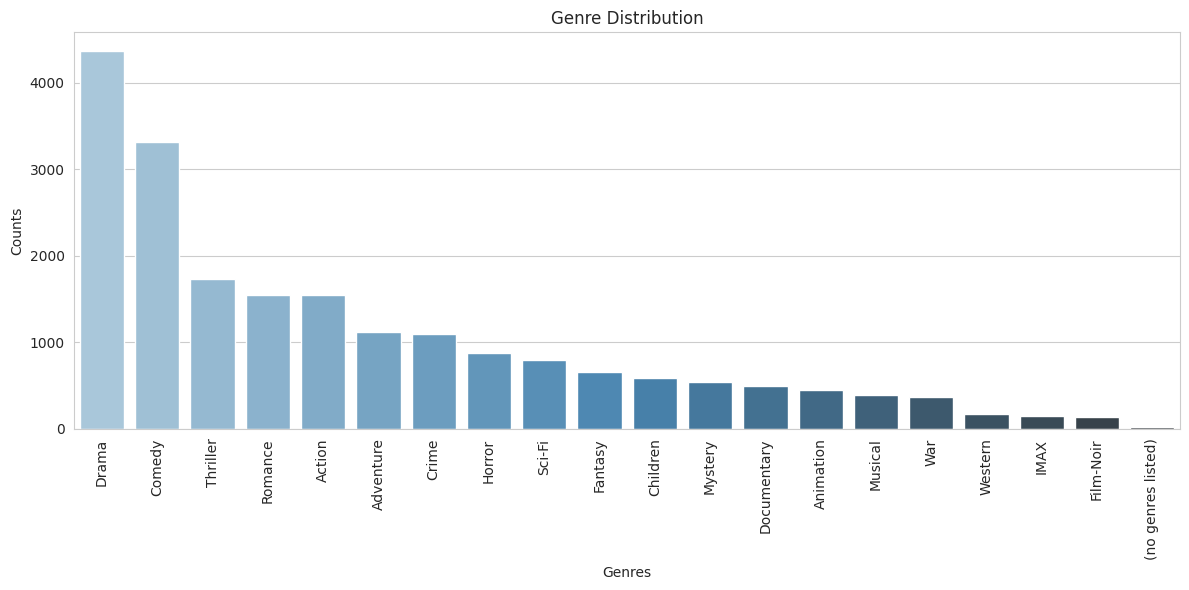

In [21]:
movies_df2 = movies_df.explode('genres')

genre_counts = movies_df2['genres'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Blues_d")
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Menampilkan jumlah missing value pada dataset**

In [22]:
movies_df.isna().sum()

movieId    0
genres     0
title      0
year       5
dtype: int64

## **Dataset Ratings**

**Menampilkan 5 baris pertama dari dataset "Ratings"**

In [23]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**Menampilkan jumlah kolom dan baris dalam dataset**

In [24]:
ratings_df.shape

(100004, 4)

**Menampilkan data duplikat pada dataset**

In [25]:
ratings_df.duplicated().sum()

0

**Menampilkan jumlah missing value pada dataset**

In [26]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

**Drop kolom "timestamp"**

In [27]:
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

<ipython-input-27-480030e56bb2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ratings_df = ratings_df.drop('timestamp', 1)


,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


**Menampilkan nilai unik dari variable "rating"**

In [28]:
ratings_df['rating'].value_counts().sort_index(ascending=True)

0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: rating, dtype: int64

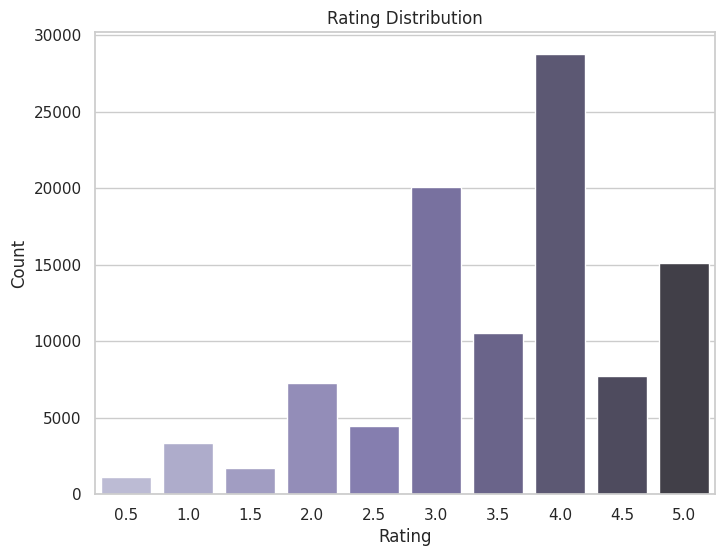

In [29]:
rating_counts = ratings_df['rating'].value_counts().sort_index(ascending=True)

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Purples", n_colors=len(rating_counts))

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Purples_d")

plt.xlabel('Rating')
plt.ylabel('Count')

plt.title('Rating Distribution')

plt.show()

# **Data Preparation**

**Menggabungkan tabel "movies" dan "ratings"**

In [30]:
movie_rating = pd.merge(movies_df, ratings_df, on='movieId')
movie_rating

,movieId,genres,title,year,userId,rating
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,7,3.0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,9,4.0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,13,5.0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,15,2.0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,19,3.0
...,...,...,...,...,...,...
99997,161944,[Drama],The Last Brickmaker in America,2001,287,5.0
99998,162376,[Drama],Stranger Things,NaN,73,4.5
99999,162542,"[Romance, Thriller]",Rustom,2016,611,5.0
100000,162672,"[Adventure, Drama, Romance]",Mohenjo Daro,2016,611,3.0


**Encoding "userId" menjadi index numerik**

In [31]:
user_ids = movie_rating["userId"].unique().tolist()
user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded_ = {i: x for i, x in enumerate(user_ids)}
num_users = len(user_encoded)
num_users

671

**Encoding "movieId" menjadi index numerik**

In [32]:
movie_ids = movie_rating["movieId"].unique().tolist()
movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movieencoded_ = {i: x for i, x in enumerate(movie_ids)}
num_movies = len(movie_encoded)
num_movies

9064

In [33]:
movie_rating["user"] = movie_rating["userId"].map(user_encoded)
movie_rating["movie"] = movie_rating["movieId"].map(movie_encoded)

movie_rating

,movieId,genres,title,year,userId,rating,user,movie
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,7,3.0,0,0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,9,4.0,1,0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,13,5.0,2,0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,15,2.0,3,0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,19,3.0,4,0
...,...,...,...,...,...,...,...,...
99997,161944,[Drama],The Last Brickmaker in America,2001,287,5.0,102,9059
99998,162376,[Drama],Stranger Things,NaN,73,4.5,22,9060
99999,162542,"[Romance, Thriller]",Rustom,2016,611,5.0,624,9061
100000,162672,"[Adventure, Drama, Romance]",Mohenjo Daro,2016,611,3.0,624,9062


**Mencari rating tertinggi dan terendah**

In [34]:
movie_rating["rating"] = movie_rating["rating"].values.astype(np.float32)

min_rating = min(movie_rating["rating"])
max_rating = max(movie_rating["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 671, Number of Movies: 9064, Min rating: 0.5, Max rating: 5.0


**Memisahkan Fitur dan Target**

In [35]:
movie_rating = movie_rating.sample(frac=1, random_state=42)
x = movie_rating[["user", "movie"]].values
y = movie_rating["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

**Memisahkan data pelatihan dan data validasi**

In [36]:
train_indices = int(0.75 * movie_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

# **Data Training**

**Membangun model**

In [37]:
embedding_size = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

        x = dot_user_movie + user_bias + movie_bias

        return tf.nn.sigmoid(x)

**Mendefinisikan model**

In [38]:
model = RecommenderNet(num_users, num_movies, embedding_size)

In [39]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**Training Model**

In [40]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
    verbose=2,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1172/1172 - 15s - loss: 0.6354 - root_mean_squared_error: 0.2418 - val_loss: 0.6144 - val_root_mean_squared_error: 0.2189 - 15s/epoch - 13ms/step
Epoch 2/5
1172/1172 - 8s - loss: 0.6094 - root_mean_squared_error: 0.2155 - val_loss: 0.6148 - val_root_mean_squared_error: 0.2189 - 8s/epoch - 7ms/step
Epoch 3/5
1172/1172 - 7s - loss: 0.6035 - root_mean_squared_error: 0.2094 - val_loss: 0.6086 - val_root_mean_squared_error: 0.2128 - 7s/epoch - 6ms/step
Epoch 4/5
1172/1172 - 8s - loss: 0.6015 - root_mean_squared_error: 0.2072 - val_loss: 0.6058 - val_root_mean_squared_error: 0.2100 - 8s/epoch - 7ms/step
Epoch 5/5
1172/1172 - 7s - loss: 0.6006 - root_mean_squared_error: 0.2062 - val_loss: 0.6071 - val_root_mean_squared_error: 0.2114 - 7s/epoch - 6ms/step


# **Visualisasi Metrik**

**Plot loss dan akurasi**

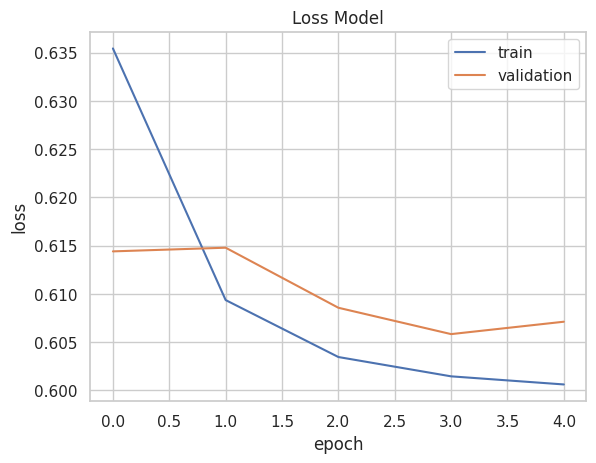

In [41]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Model")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

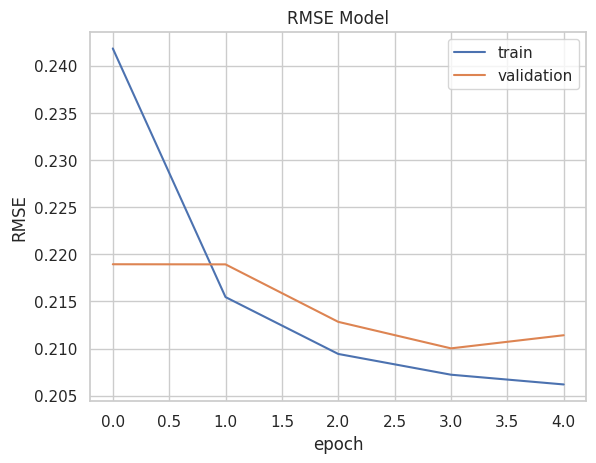

In [42]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("RMSE Model")
plt.ylabel("RMSE")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

# **Model Development - Collaborative Filtering**

**Top Movies**

In [43]:
user_id = movie_rating.userId.sample(1).iloc[0]

movies_watched = movie_rating[movie_rating.userId == user_id]

movies_notwatched = movie_rating[~movie_rating["movieId"].isin(movies_watched.movieId.values)]["movieId"]
movies_notwatched = list(set(movies_notwatched).intersection(set(movie_encoded.keys())))
movies_notwatched = [[movie_encoded.get(x)] for x in movies_notwatched]

user_encoder = user_encoded.get(user_id)
user_movie_array = np.hstack(([[user_encoder]] * len(movies_notwatched), movies_notwatched))

ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movieencoded_.get(movies_notwatched[x][0]) for x in top_ratings_indices
]

print("Tampilkan Rekomendasi Film untuk {} Penonton ".format(num_users))

271/271 [==============================] - 1s 2ms/step
Tampilkan Rekomendasi Film untuk 671 Penonton 


**5 Film dengan rating tertinggi**

In [44]:
print("====" * 9)

print("Top 5 Film dengan Rating Tertinggi")

print("====" * 9)

top_movies_user = movies_watched.sort_values(by="rating", ascending=False).head(5)
for index, row in top_movies_user.iterrows():
    print(row.title, ":", row.genres)

Top 5 Film dengan Rating Tertinggi
Three Days of the Condor (3 Days of the Condor) : ['Drama', 'Mystery', 'Romance', 'Thriller']
Enchanted April : ['Drama', 'Romance']
Electric Horseman, The : ['Comedy', 'Western']
Midnight in Paris : ['Comedy', 'Fantasy', 'Romance']
North by Northwest : ['Action', 'Adventure', 'Mystery', 'Romance', 'Thriller']


**Top 10 Rekomendasi Film**

In [45]:
print("====" * 6)

print("Top 10 Rekomendasi Film")

print("====" * 6)

recommended_movie_ids = []
for x in top_ratings_indices:
    movie_id = movieencoded_.get(movies_notwatched[x][0])
    if movie_id not in recommended_movie_ids:
        recommended_movie_ids.append(movie_id)

movie_rating_unique = movie_rating.drop_duplicates(subset="movieId")
recommended_movies = movie_rating_unique[movie_rating_unique["movieId"].isin(recommended_movie_ids)].head(10)
for index, row in recommended_movies.iterrows():
    print(row.title, ":", row.genres)

Top 10 Rekomendasi Film
Seven Samurai (Shichinin no samurai) : ['Action', 'Adventure', 'Drama']
Grand Day Out with Wallace and Gromit, A : ['Adventure', 'Animation', 'Children', 'Comedy', 'Sci-Fi']
Godfather, The : ['Crime', 'Drama']
Godfather: Part II, The : ['Crime', 'Drama']
Psycho : ['Crime', 'Horror']
Goodfellas : ['Crime', 'Drama']
Memento : ['Mystery', 'Thriller']
Name of the Rose, The (Name der Rose, Der) : ['Crime', 'Drama', 'Mystery', 'Thriller']
Usual Suspects, The : ['Crime', 'Mystery', 'Thriller']
Ran : ['Drama', 'War']


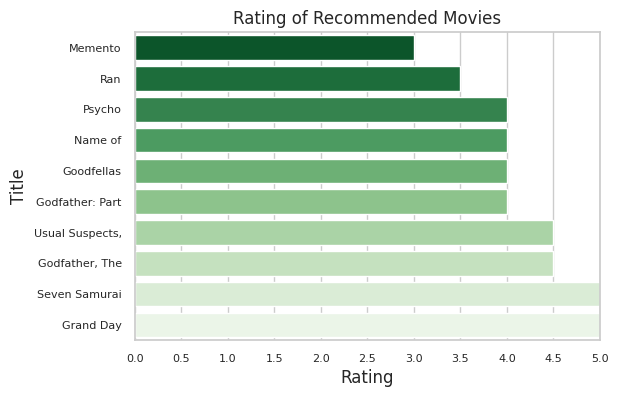

In [46]:
rm = recommended_movies.groupby('title')['rating'].max()
rt = rm.sort_values(ascending=False)

titles = rt.index
ratings = rt.values
palette = sns.color_palette("Greens", n_colors=len(titles))

plt.figure(figsize=(6, 4))
sns.barplot(x=ratings, y=titles, palette=palette)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.title('Rating of Recommended Movies')
plt.gca().invert_yaxis()
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5), fontsize=8)

y_axis_labels = [' '.join(title.split()[:2]) for title in titles]
plt.yticks(range(len(titles)), y_axis_labels, fontsize=8)
plt.show()

# **Model Development - Content Based Filtering**

**Membuat pivot table untuk menggabungkan pengguna yang memberikan rating dan jumlah film yang mendapat rating**

In [47]:
no_user_voted = movie_rating.groupby('movieId')['rating'].agg('count')
no_movies_voted = movie_rating.groupby('userId')['rating'].agg('count')

final_dataset = movie_rating.pivot(index='movieId',columns='userId',values='rating')
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualisasi jumlah pengguna yang memberikan rating dengan threshold = 10**

In [48]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


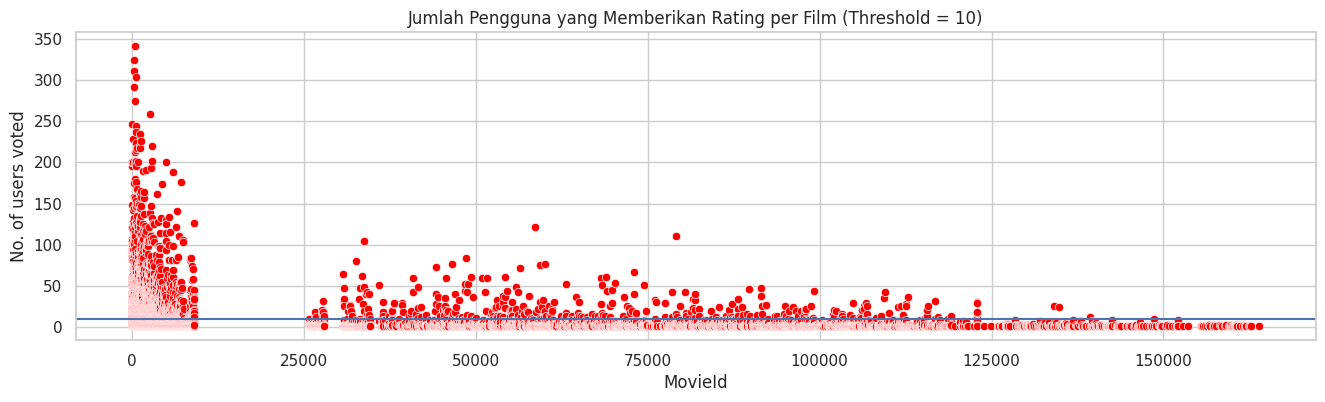

In [49]:
sns.set(style="whitegrid")

f, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.scatterplot(data=no_user_voted, x=no_user_voted.index, y=no_user_voted, color='red')
plt.axhline(y=10, color='b')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.title('Jumlah Pengguna yang Memberikan Rating per Film (Threshold = 10)')
plt.show()

**Visualisasikan jumlah pemberian rating oleh setiap pengguna dengan threshold = 50**

In [50]:
final_dataset = final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


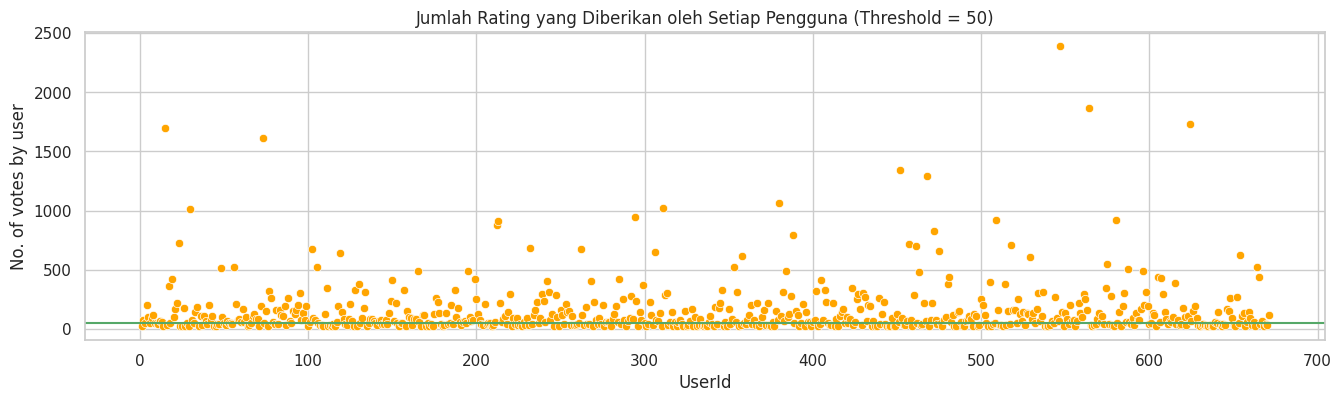

In [51]:
sns.set(style="whitegrid")

f, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.scatterplot(data=no_movies_voted, x=no_movies_voted.index, y=no_movies_voted, color='orange')
plt.axhline(y=50, color='g')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.title('Jumlah Rating yang Diberikan oleh Setiap Pengguna (Threshold = 50)')
plt.show()

**Menggunakan algoritma KNN**

In [52]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [53]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=30, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

In [54]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movie_rating[movie_rating['title'].str.contains(movie_name)]

    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []

        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movie_rating[movie_rating['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movie_rating.iloc[idx]['title'].values[0],'Genres': movie_rating['genres'].values[0], 'Rating': movie_rating['rating'].values[0]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df

    else:
        return "No movies found. Please check your input"

**Rekomendasi Film sesuai user input**

In [55]:
rec = get_movie_recommendation('Avengers')
rec

,Title,Genres,Rating
1,"Matrix, The","[Adventure, Children, Comedy, Musical]",4.0
2,Spartacus,"[Adventure, Children, Comedy, Musical]",4.0
3,Land of Silence and Darkness (Land des Schweig...,"[Adventure, Children, Comedy, Musical]",4.0
4,"Right Stuff, The","[Adventure, Children, Comedy, Musical]",4.0
5,Requiem for a Dream,"[Adventure, Children, Comedy, Musical]",4.0
6,Austin Powers: The Spy Who Shagged Me,"[Adventure, Children, Comedy, Musical]",4.0
7,North,"[Adventure, Children, Comedy, Musical]",4.0
8,Things Change,"[Adventure, Children, Comedy, Musical]",4.0
9,"Joy Luck Club, The","[Adventure, Children, Comedy, Musical]",4.0
10,13 Going on 30,"[Adventure, Children, Comedy, Musical]",4.0


**Menghitung Precision Score**

In [56]:
movie_relevant = 10
movie_recommendation = len(rec)
precision_score = movie_relevant / movie_recommendation

print("Precision: {:.2f}".format(precision_score))

Precision: 1.00
